# WEB SCRAPPING DATA FROM IMDB AND PERFORMING K-MEANS CLUSTERING (STEP 1)

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating an empty list to add our data
main_list = []

# Start
start = 1

# Count
count = 250         # Max value is 250

In [3]:
URL_MOVIES = f"https://www.imdb.com/search/title/?title_type=feature&start={start}&count={count}"
URL_SERIES = f"https://www.imdb.com/search/title/?title_type=tv_series&start={start}&count={count}"
URL_UPCOMING = "https://www.imdb.com/calendar/?ref_=rlm&region=CA&type=MOVIE"

In [4]:
# How many data you need
total_data = 10000

# Total loops
loop = total_data//count           # we see 50 data on 1 page at a time

print(loop)

40


In [5]:
total_data

10000

In [6]:
for i in range(loop//2):
    URL_MOVIES = f"https://www.imdb.com/search/title/?title_type=feature&start={start+(i*count)}&count={count}"
    source = requests.get(URL_MOVIES).text
    soup = BeautifulSoup(source, 'lxml')
    article = soup.findAll('div', class_='lister-item-content')
    main_list += article
    print(i)
for i in range(loop//2):
    URL_SERIES = f"https://www.imdb.com/search/title/?title_type=tv_series&start={start+(i*count)}&count={count}"
    source = requests.get(URL_SERIES).text
    soup = BeautifulSoup(source, 'lxml')
    article = soup.findAll('div', class_='lister-item-content')
    main_list += article
    print((loop//2)+i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


## -----------------

In [10]:
# print(main_list[2500].h3.a.text)
print(main_list[4].h3.a.text)

The Whale


In [11]:
# print(main_list[2500].findAll('p')[3].span.text == 'Votes:')
print(main_list[2500].findAll('p')[3].findAll('span')[1].text)
print(main_list[4].findAll('p')[3].findAll('span')[1].text)

143,979
89,630


All movies have director + stars, whereas series only have stars info

In [12]:
# print(main_list[4])
# print(main_list[4].findAll('p')[3])


# temp = ''
# for i in main_list[4].findAll('p')[2].findAll('a')[1:]:
#     temp += i.text + ", "

# print(temp[:-2])
main_list[0].h3.find('span', class_= 'lister-item-year text-muted unbold').text

# print(main_list[4].findAll('p')[2].findAll('a')[1:])                                            # For cast
# print(main_list[4].findAll('p')[2].findAll())
# print(main_list[4].div.div.strong.text)                                                         # Rating
# print(main_list[4].findAll('p')[0].findAll('span'))                                
# print(main_list[4].findAll('p')[0].find('span', class_='genre').text)                           # Genre                          
# print(main_list[4].findAll('p')[0].find('span', class_='runtime').text)                         # Runtime                          
# print(main_list[1].findAll('p')[0].find('span', class_= 'certificate').text)                    # Certificate
# print((main_list[4].findAll('p')[1].text))                                                      # Summary of the move/series
# print((main_list[4].findAll('p')[2]))
# print((main_list[4].findAll('p')[3]))
# print(main_list[4].h3.a.text)                                                                   # Name of the movie/series
# print(main_list[4].h3.span.text)                                                                # Ranking in the popularity list
# print(main_list[4].h3.find('span', class_= 'lister-item-year text-muted unbold').text)          # Year
# print(main_list[4].findAll('p', class_= 'text-muted'))

'(2023)'

## -----------------

## Raw data collected

In [13]:
# Making list for the information to be extracted
popularity_ranking = []
name = []
rating = []
summary = []
votes = []
cast = []
certificate = []
runtime = []
genre = []
year = []
director = []
gross = []
type_of_content = []

In [14]:
for i in range(len(main_list)):
    temp = ''
    try:
        popularity_ranking.append(main_list[i].h3.span.text)
        name.append(main_list[i].h3.a.text)
        certificate.append(main_list[i].findAll('p')[0].find('span', class_= 'certificate').text)
        genre.append(main_list[i].findAll('p')[0].find('span', class_='genre').text)
        rating.append(main_list[i].div.div.strong.text)
        year.append(main_list[i].h3.find('span', class_= 'lister-item-year text-muted unbold').text)
        runtime.append(main_list[i].findAll('p')[0].find('span', class_='runtime').text)
        summary.append(main_list[i].findAll('p')[1].text)
        votes.append(main_list[i].findAll('p')[3].findAll('span')[1].text)
        gross.append(main_list[i].findAll('p')[3].findAll('span')[4].text)

        if i < (total_data//2):                        # It's a movie
            type_of_content.append('Movie')
            director.append(main_list[i].findAll('p')[2].findAll('a')[0].text)
            for casting in main_list[i].findAll('p')[2].findAll('a')[1:]:
                temp += casting.text + ", "
            cast.append(temp[:2])
        else:
            type_of_content.append('Series')
            director.append('')
            for casting in main_list[i].findAll('p')[2].findAll('a'):
                temp += casting.text + ", "
            cast.append(temp[:2])

    except:
        pass

In [15]:
print("Popularity ranking: ", len(popularity_ranking))
print("Name: ", len(name))
print("Rating: ", len(rating))
print("Summary: ", len(summary))
print("Votes: ", len(votes))
print("Certificate: ", len(certificate))
print("Runtime: ", len(runtime))
print("Genre: ", len(genre))
print("Year: ", len(year))
print("Case: ", len(cast))
print("Director: ", len(director))
print("Gross: ", len(gross))
print("Types of Content: ", len(type_of_content))

Popularity ranking:  10000
Name:  10000
Rating:  6859
Summary:  6763
Votes:  6763
Certificate:  6903
Runtime:  6763
Genre:  6903
Year:  6859
Case:  3436
Director:  3436
Gross:  3436
Types of Content:  3436


# After analysing the issue above and, checking our data with the website; we can confirm that those missing values occur because of movies/series that have no yet released so they have missing values or they don't have all the information (STEP 2)

## All of the tags below has no missing values so we can extract the data easily 

In [16]:
# Making list for the information to be extracted
popularity_ranking = []
name = []
rating = []
summary = []
votes = []
cast = []
certificate = []
runtime = []
genre = []
year = []
director = []
gross = []
type_of_content = []

In [17]:
for i in range(len(main_list)):
    popularity_ranking.append(main_list[i].h3.span.text)
    name.append(main_list[i].h3.a.text)
    year.append(main_list[i].h3.find('span', class_= 'lister-item-year text-muted unbold').text)
    summary.append(main_list[i].findAll('p')[1].text)
    temp = ''
    if i < total_data//2:                                        # It's a movie
        type_of_content.append('Movie')
        director.append(main_list[i].findAll('p')[2].findAll('a')[0].text)
        for casting in main_list[i].findAll('p')[2].findAll('a')[1:]:
            temp += casting.text + ", "
        cast.append(temp[:-2])
    else:
        type_of_content.append('Series')
        director.append('')
        for casting in main_list[i].findAll('p')[2].findAll('a'):
            temp += casting.text + ", "
        cast.append(temp[:-2])

### Tags below has missing values which will throw error; so we are filling those values with '' so we have exact same data size

In [18]:
for i in range(len(main_list)):
    try:
        certificate.append(main_list[i].findAll('p')[0].find('span', class_= 'certificate').text)
    except AttributeError:
        certificate.append(np.NaN)

In [19]:
for i in range(len(main_list)):
    try:
        rating.append(main_list[i].div.div.strong.text)
    except AttributeError:
        rating.append(np.NaN)

In [20]:
for i in range(len(main_list)):
    try:
        runtime.append(main_list[i].findAll('p')[0].find('span', class_='runtime').text)
    except AttributeError:
        runtime.append('Upcoming')

In [21]:
for i in range(len(main_list)):
    try:
        votes.append(main_list[i].findAll('p')[3].findAll('span')[1].text)
    except IndexError:
        votes.append('Upcoming')

In [22]:
for i in range(len(main_list)):
    try:
        genre.append(main_list[i].findAll('p')[0].find('span', class_='genre').text)
    except AttributeError:
        genre.append(np.NaN)

In [23]:
for i in range(len(main_list)):
    try:
        gross.append(main_list[i].findAll('p')[3].findAll('span')[4].text)
    except IndexError:
        gross.append(np.NaN)

### Values

In [24]:
print("Popularity ranking: ", len(popularity_ranking))
print("Name: ", len(name))
print("Rating: ", len(rating))
print("Summary: ", len(summary))
print("Votes: ", len(votes))
print("Certificate: ", len(certificate))
print("Runtime: ", len(runtime))
print("Genre: ", len(genre))
print("Year: ", len(year))
print("Case: ", len(cast))
print("Director: ", len(director))
print("Gross: ", len(gross))
print("Types of Content: ", len(type_of_content))

Popularity ranking:  10000
Name:  10000
Rating:  10000
Summary:  10000
Votes:  10000
Certificate:  10000
Runtime:  10000
Genre:  10000
Year:  10000
Case:  10000
Director:  10000
Gross:  10000
Types of Content:  10000


## Creating Database

In [25]:
dictonary = {"Popularity Ranking" : popularity_ranking,
             "Name" : name,
             "Year" : year,
             "Certificate" : certificate,
             "Runtime" : runtime,
             "Genre" : genre,
             "Rating" : rating,
             "Summary" : summary, 
             "Director" : director,
             "Stars" : cast,
             "Votes" : votes,
             "Gross" : gross,
             "Type of Content" : type_of_content}
db = pd.DataFrame(dictonary, columns= dictonary.keys())

In [26]:
(db.tail(10))

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
9990,"4,991.",Hoops,(2020),TV-MA,25 min,"\nAnimation, Comedy, Sport",6.0,"\nCenters on a hot-headed, foul-mouthed high s...",,"Jake Johnson, Ron Funches, Cleo King, Natasha ...","6,712",NaN,Series
9991,"4,992.",Mai,(2022– ),NaN,45 min,"\nCrime, Drama, Thriller",7.1,\nA grieving mother discovers the criminals be...,,"Sakshi Tanwar, Vivek Mushran, Wamiqa Gabbi, Ra...","5,334",NaN,Series
9992,"4,993.",The Millionaire,(1955–1960),NaN,30 min,\nDrama,7.8,"\nIn this hit 1950s TV series, a millionaire i...",,"Marvin Miller, Paul Frees, Roy Gordon, Russ Co...",564,NaN,Series
9993,"4,994.",The Simple Life,(2003–2007),NaN,22 min,"\nComedy, Reality-TV",4.0,\nParis and Nicole accept various internships ...,,"Paris Hilton, Nicole Richie, James DuMont, Dav...","5,739",NaN,Series
9994,"4,995.",The Garfield Show,(2008–2016),NaN,25 min,"\nAnimation, Adventure, Comedy",5.4,\nA lasagne-loving pussycat adventures and exp...,,"Frank Welker, Wally Wingert, Gregg Berger, Jas...","2,801",NaN,Series
9995,"4,996.",This Time with Alan Partridge,(2019–2021),NaN,30 min,\nComedy,8.0,\nAlan is handed a career lifeline: the chance...,,"Steve Coogan, Susannah Fielding, Felicity Mont...","4,194",NaN,Series
9996,"4,997.",The Mickey Mouse Club,(1955–1958),NaN,60 min,"\nComedy, Drama, Family",7.6,\nMickey Mouse hosts a youth-oriented variety ...,,"Jimmie Dodd, Darlene Gillespie, Sharon Baird, ...",818,NaN,Series
9997,"4,998.",Witchblade,(2001–2002),NaN,60 min,"\nAction, Drama, Fantasy",6.4,\nNYPD Det. Sara Pezzini has a supernatural we...,,"Yancy Butler, David Chokachi, Anthony Cistaro,...","2,720",NaN,Series
9998,"4,999.",I am Georgina,(2022),TV-14,41 min,\nReality-TV,4.0,"\nJoin Georgina Rodríguez - mom, influencer, b...",,"Georgina Rodríguez, Cristiano Ronaldo","3,322",NaN,Series
9999,"5,000.",Animorphs,(1998–2000),NaN,30 min,"\nFantasy, Sci-Fi, Thriller",6.5,\nFive teenagers and an alien with the ability...,,"Boris Cabrera, Nadia-Leigh Nascimento, Shawn A...","1,401",NaN,Series


In [27]:
db.isna().sum()

Popularity Ranking       0
Name                     0
Year                     0
Certificate           3097
Runtime                  0
Genre                    6
Rating                 355
Summary                  0
Director                 0
Stars                    0
Votes                    0
Gross                 6497
Type of Content          0
dtype: int64

### Cleaning some values

Year value: (formating and some values that are filled with wrong data)

In [28]:
temp = []
for i in year:
    if i == "":
        temp.append(np.NaN)
    else:
        temp.append(re.findall('\d+.*', i))

In [29]:
temp_2 = []
for i in range(len(temp)):
    if type(temp[i]) != float and temp[i] != []:
        temp_2.append(temp[i][0][:-1])
    else:
        temp_2.append(np.NaN)

In [30]:
db['Year'] = temp_2

Genre:

In [31]:
temp = genre.copy()
temp_2 = []
for i in temp:
    try:
        x = i[1:]
        temp_2.append(x.rstrip())
    except:
        temp_2.append(np.NaN)

In [32]:
db['Genre'] = temp_2

Summary:

In [33]:
temp = summary.copy()
temp_2 = []
for i in temp:
    x = i[1:]
    temp_2.append(x)

In [34]:
db['Summary'] = temp_2

Popularity Ranking:

In [35]:
temp = popularity_ranking.copy()
temp_2 = []
for i in temp:
    x = int(re.sub(r'[^\d]', '', i))
    temp_2.append(x)

In [36]:
db['Popularity Ranking'] = temp_2

### Removing some NaN values

In [37]:
db.loc[db["Runtime"] == 'Upcoming', "Certificate"] = 'Upcoming'
db.dropna(subset= ['Certificate', 'Genre'], inplace= True)

In [38]:
db.head(10)

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Scream VI,2023,14A,122 min,"Horror, Mystery, Thriller",7.3,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","20,665",NaN,Movie
1,2,Creed III,2023,PG,116 min,"Drama, Sport",7.3,Adonis has been thriving in both his career an...,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...","21,205",NaN,Movie
2,3,Everything Everywhere All at Once,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","371,173",$72.86M,Movie
3,4,Cocaine Bear,2023,18A,95 min,"Comedy, Thriller",6.3,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","22,380",NaN,Movie
4,5,The Whale,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","89,630",NaN,Movie
5,6,Ghosted,2023,Upcoming,Upcoming,"Action, Adventure, Comedy",NaN,Cole falls head over heels for enigmatic Sadie...,Dexter Fletcher,"Ana de Armas, Amy Sedaris, Chris Evans, Adrien...",Upcoming,NaN,Movie
6,7,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023,Upcoming,Upcoming,"Animation, Action, Adventure",NaN,The Turtle brothers as they work to earn the l...,Jeff Rowe,"Kyler Spears, Rose Byrne, Ayo Edebiri, Seth Ro...",Upcoming,NaN,Movie
7,8,65,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","5,960",NaN,Movie
8,9,Triangle of Sadness,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","105,262",NaN,Movie
9,10,Ant-Man and the Wasp: Quantumania,2023,PG,124 min,"Action, Adventure, Comedy",6.5,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...","86,828",NaN,Movie


In [39]:
db.loc[db["Runtime"] == 'Upcoming', "Rating"] = 'Upcoming'
db.dropna(subset= ['Rating', 'Year'], inplace= True)
print(db.shape)

(7303, 13)


In [40]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7303 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Popularity Ranking  7303 non-null   int64 
 1   Name                7303 non-null   object
 2   Year                7303 non-null   object
 3   Certificate         7303 non-null   object
 4   Runtime             7303 non-null   object
 5   Genre               7303 non-null   object
 6   Rating              7303 non-null   object
 7   Summary             7303 non-null   object
 8   Director            7303 non-null   object
 9   Stars               7303 non-null   object
 10  Votes               7303 non-null   object
 11  Gross               3436 non-null   object
 12  Type of Content     7303 non-null   object
dtypes: int64(1), object(12)
memory usage: 798.8+ KB


### We aren't imputing/changing 'Gross' column since it has large value and mostly consist of Movies series

In [41]:
db.head(10)

,Popularity Ranking,Name,Year,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Scream VI,2023,14A,122 min,"Horror, Mystery, Thriller",7.3,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","20,665",NaN,Movie
1,2,Creed III,2023,PG,116 min,"Drama, Sport",7.3,Adonis has been thriving in both his career an...,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...","21,205",NaN,Movie
2,3,Everything Everywhere All at Once,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","371,173",$72.86M,Movie
3,4,Cocaine Bear,2023,18A,95 min,"Comedy, Thriller",6.3,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","22,380",NaN,Movie
4,5,The Whale,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","89,630",NaN,Movie
5,6,Ghosted,2023,Upcoming,Upcoming,"Action, Adventure, Comedy",Upcoming,Cole falls head over heels for enigmatic Sadie...,Dexter Fletcher,"Ana de Armas, Amy Sedaris, Chris Evans, Adrien...",Upcoming,NaN,Movie
6,7,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023,Upcoming,Upcoming,"Animation, Action, Adventure",Upcoming,The Turtle brothers as they work to earn the l...,Jeff Rowe,"Kyler Spears, Rose Byrne, Ayo Edebiri, Seth Ro...",Upcoming,NaN,Movie
7,8,65,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","5,960",NaN,Movie
8,9,Triangle of Sadness,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","105,262",NaN,Movie
9,10,Ant-Man and the Wasp: Quantumania,2023,PG,124 min,"Action, Adventure, Comedy",6.5,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...","86,828",NaN,Movie


### Now let's update our Year value into 2 different columns, Released and Finished

In [42]:
db.rename(columns= {'Year' : 'Released'}, inplace= True)
db.insert(3, 'Finished', db['Released'], True)
db.head(10)

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.3,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","20,665",NaN,Movie
1,2,Creed III,2023,2023,PG,116 min,"Drama, Sport",7.3,Adonis has been thriving in both his career an...,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...","21,205",NaN,Movie
2,3,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","371,173",$72.86M,Movie
3,4,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.3,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","22,380",NaN,Movie
4,5,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","89,630",NaN,Movie
5,6,Ghosted,2023,2023,Upcoming,Upcoming,"Action, Adventure, Comedy",Upcoming,Cole falls head over heels for enigmatic Sadie...,Dexter Fletcher,"Ana de Armas, Amy Sedaris, Chris Evans, Adrien...",Upcoming,NaN,Movie
6,7,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023,2023,Upcoming,Upcoming,"Animation, Action, Adventure",Upcoming,The Turtle brothers as they work to earn the l...,Jeff Rowe,"Kyler Spears, Rose Byrne, Ayo Edebiri, Seth Ro...",Upcoming,NaN,Movie
7,8,65,2023,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","5,960",NaN,Movie
8,9,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","105,262",NaN,Movie
9,10,Ant-Man and the Wasp: Quantumania,2023,2023,PG,124 min,"Action, Adventure, Comedy",6.5,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...","86,828",NaN,Movie


In [43]:
temp = []
for i in db['Released']:
    temp.append(re.findall('\d+.', i))

In [44]:
# Updating Released year info

temp_2 = []
for i in range(len(temp)):
    try:
        temp_2.append(int(temp[i][0]))
    except:
        temp_2.append(int(temp[i][0][:4]))
db['Released'] = temp_2

In [45]:
# Updating Finish year info

temp_2 = []
for i in range(len(temp)):
    try:
        temp_2.append(int(temp[i][-1]))
    except:
        temp_2.append('Running')
db['Finished'] = temp_2

## Saving the database

In [49]:
db.to_csv('main.csv')

## Read

In [3]:
db = pd.read_csv('main.csv')

In [4]:
db.drop(columns= 'Unnamed: 0', inplace= True)

## Now before continuing with EDA, lets seperate our database into X and Y, where Y db will have all the Upcoming values

In [186]:
X = db[db['Rating'] != 'Upcoming']
print(X.shape)

(6763, 14)


In [7]:
X.head(10)

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.3,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","20,665",NaN,Movie
1,2,Creed III,2023,2023,PG,116 min,"Drama, Sport",7.3,Adonis has been thriving in both his career an...,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...","21,205",NaN,Movie
2,3,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","371,173",$72.86M,Movie
3,4,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.3,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","22,380",NaN,Movie
4,5,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","89,630",NaN,Movie
7,8,65,2023,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","5,960",NaN,Movie
8,9,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","105,262",NaN,Movie
9,10,Ant-Man and the Wasp: Quantumania,2023,2023,PG,124 min,"Action, Adventure, Comedy",6.5,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...","86,828",NaN,Movie
10,11,A Man Called Otto,2022,2022,G,126 min,"Comedy, Drama",7.5,Otto is a grump who's given up on life followi...,Marc Forster,"Tom Hanks, Mariana Treviño, Rachel Keller, Joh...","38,362",$62.47M,Movie
11,12,Fall,2022,2022,14A,107 min,Thriller,6.4,Best friends Becky and Hunter find themselves ...,Scott Mann,"Grace Caroline Currey, Virginia Gardner, Mason...","65,141",NaN,Movie


# Exploratory Data Analysis (STEP 3)

In [120]:
(X.head(10))

,Popularity Ranking,Name,Released,Finished,Certificate,Runtime,Genre,Rating,Summary,Director,Stars,Votes,Gross,Type of Content
0,1,Scream VI,2023,2023,14A,122 min,"Horror, Mystery, Thriller",7.3,"In the next installment, the survivors of the ...",Matt Bettinelli-Olpin,"Tyler Gillett, Courteney Cox, Melissa Barrera,...","20,665",NaN,Movie
1,2,Creed III,2023,2023,PG,116 min,"Drama, Sport",7.3,Adonis has been thriving in both his career an...,Michael B. Jordan,"Michael B. Jordan, Tessa Thompson, Jonathan Ma...","21,205",NaN,Movie
2,3,Everything Everywhere All at Once,2022,2022,14A,139 min,"Action, Adventure, Comedy",7.9,A middle-aged Chinese immigrant is swept up in...,Daniel Kwan,"Daniel Scheinert, Michelle Yeoh, Stephanie Hsu...","371,173",$72.86M,Movie
3,4,Cocaine Bear,2023,2023,18A,95 min,"Comedy, Thriller",6.3,"An oddball group of cops, criminals, tourists ...",Elizabeth Banks,"Keri Russell, Alden Ehrenreich, O'Shea Jackson...","22,380",NaN,Movie
4,5,The Whale,2022,2022,14A,117 min,Drama,7.8,"A reclusive, morbidly obese English teacher at...",Darren Aronofsky,"Brendan Fraser, Sadie Sink, Ty Simpkins, Hong ...","89,630",NaN,Movie
7,8,65,2023,2023,14A,93 min,"Action, Adventure, Drama",5.7,An astronaut crash lands on a mysterious plane...,Scott Beck,"Bryan Woods, Adam Driver, Ariana Greenblatt, C...","5,960",NaN,Movie
8,9,Triangle of Sadness,2022,2022,PG,147 min,"Comedy, Drama",7.4,A fashion model celebrity couple join an event...,Ruben Östlund,"Thobias Thorwid, Harris Dickinson, Charlbi Dea...","105,262",NaN,Movie
9,10,Ant-Man and the Wasp: Quantumania,2023,2023,PG,124 min,"Action, Adventure, Comedy",6.5,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, Evangeline Lilly, Michael Douglas, ...","86,828",NaN,Movie
10,11,A Man Called Otto,2022,2022,G,126 min,"Comedy, Drama",7.5,Otto is a grump who's given up on life followi...,Marc Forster,"Tom Hanks, Mariana Treviño, Rachel Keller, Joh...","38,362",$62.47M,Movie
11,12,Fall,2022,2022,14A,107 min,Thriller,6.4,Best friends Becky and Hunter find themselves ...,Scott Mann,"Grace Caroline Currey, Virginia Gardner, Mason...","65,141",NaN,Movie


In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Popularity Ranking  6763 non-null   int64 
 1   Name                6763 non-null   object
 2   Released            6763 non-null   int64 
 3   Finished            6763 non-null   object
 4   Certificate         6763 non-null   object
 5   Runtime             6763 non-null   object
 6   Genre               6763 non-null   object
 7   Rating              6763 non-null   object
 8   Summary             6763 non-null   object
 9   Director            4476 non-null   object
 10  Stars               6762 non-null   object
 11  Votes               6763 non-null   object
 12  Gross               3436 non-null   object
 13  Type of Content     6763 non-null   object
dtypes: int64(2), object(12)
memory usage: 792.5+ KB


In [9]:
# Different genre of movies/series in our dataset

different_genre = X['Genre'].unique()
different_genre_set = []
for i in different_genre:
    temp = i.split(', ')
    different_genre_set.extend(temp)
different_genre_set = set(different_genre_set)
print(different_genre_set)
some_dictonary = {k:0 for k in different_genre_set}

{'Thriller', 'Horror', 'Film-Noir', 'Reality-TV', 'Drama', 'History', 'War', 'Animation', 'Short', 'Crime', 'Musical', 'Music', 'Sport', 'Romance', 'Mystery', 'Talk-Show', 'Sci-Fi', 'Fantasy', 'Western', 'Adventure', 'Game-Show', 'News', 'Documentary', 'Family', 'Comedy', 'Action', 'Biography'}


In [10]:
len(different_genre_set)

27

In [11]:
for i in list(different_genre_set):
    for j in X['Genre']:
        if i in j:
            some_dictonary[i] += 1

In [12]:
sum(list(some_dictonary.values()))

# This is more than double the total number of movies we have, so we can say in average a movie/series contains atleast 2 genre.

17436

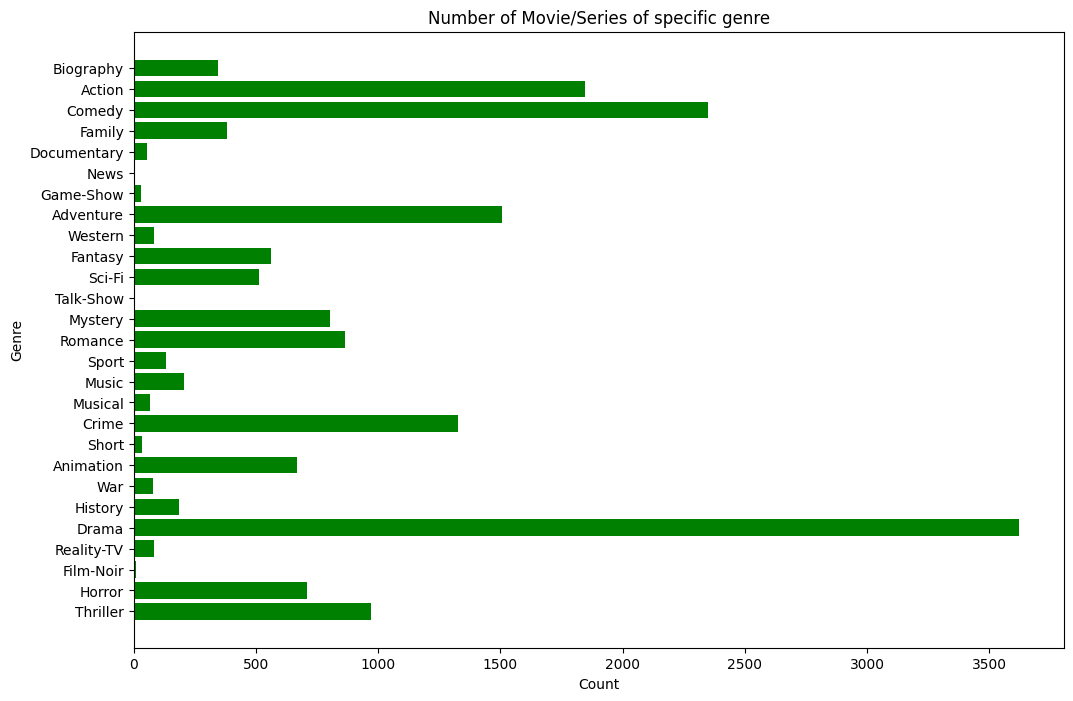

In [13]:
plt.figure(figsize=(12,8))
plt.barh(list(some_dictonary.keys()), list(some_dictonary.values()),  color='g')
plt.title("Number of Movie/Series of specific genre")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

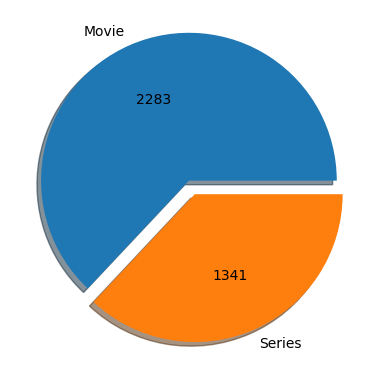

In [127]:
# In drama which is more movie or seires?

drama_group = X.loc[X['Genre'].str.contains("Drama")]
drama_group = drama_group.groupby('Type of Content')['Type of Content'].count()

plt.pie(drama_group, labels= drama_group.index, autopct= lambda x: f'{x*drama_group.sum()/100:.0f}', explode= [0.1, 0], shadow= True)
plt.show()

In [128]:
year_group = (X.groupby(['Released'])['Name'].count())

In [129]:
index = np.arange(0, year_group.count())

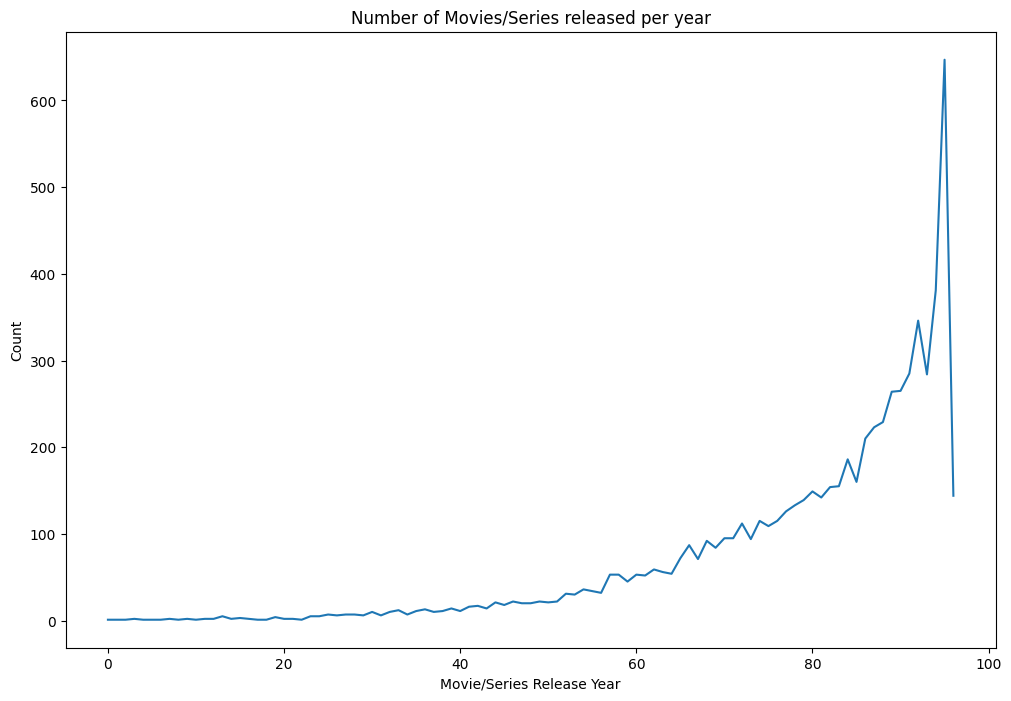

In [130]:
plt.figure(figsize=(12,8))
plt.plot(list(year_group.values))
# plt.xticks([0, 100])
# plt.xticks(ticks= index ,labels= list(year_group.index), rotation= 90)
# plt.xticks(ticks= [0,1,2,3,4,5,6,7,8] ,labels= [1920,1930,1940,1950,1960,1970,1980,2020], rotation= 90)
plt.title('Number of Movies/Series released per year')
plt.xlabel('Movie/Series Release Year')
plt.ylabel('Count')
plt.show()

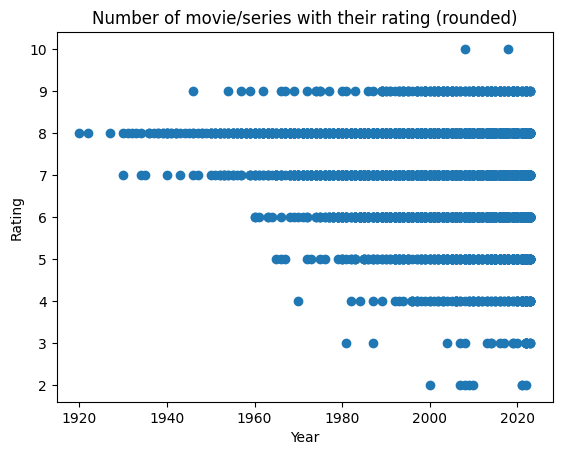

In [131]:
plt.scatter((X['Released']), [round(float(x)) for x in (X['Rating'])])
plt.title('Number of movie/series with their rating (rounded)')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

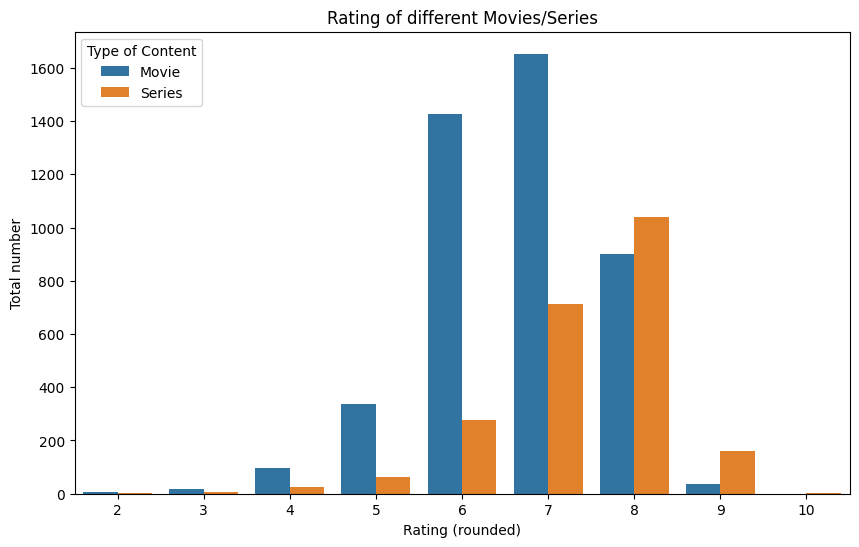

In [132]:
def convert(x):
    return round(float(x))

rating_group = X.copy()
rating_group['Rating'] = rating_group['Rating'].apply(convert)
rating_group = rating_group.groupby('Rating')['Type of Content'].value_counts().reset_index(name= 'count')

plt.figure(figsize=(10,6))
sns.barplot(data=rating_group, x='Rating', y='count', hue="Type of Content")
plt.ylabel("Total number")
plt.xlabel("Rating (rounded)")
plt.title('Rating of different Movies/Series')
plt.show()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\2842355289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_release['Runtime'] = runtime_release['Runtime'].apply(change_runtime)


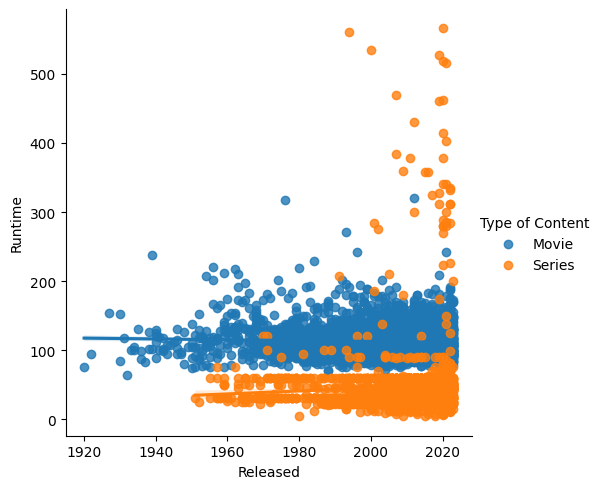

In [133]:
def change_runtime(x):
   return int((re.findall(r'\d+', x))[0])

runtime_release = X[['Released', 'Runtime', 'Type of Content']]
runtime_release['Runtime'] = runtime_release['Runtime'].apply(change_runtime)
sns.lmplot(data= runtime_release, x= 'Released', y= 'Runtime' , hue= 'Type of Content')
plt.show()

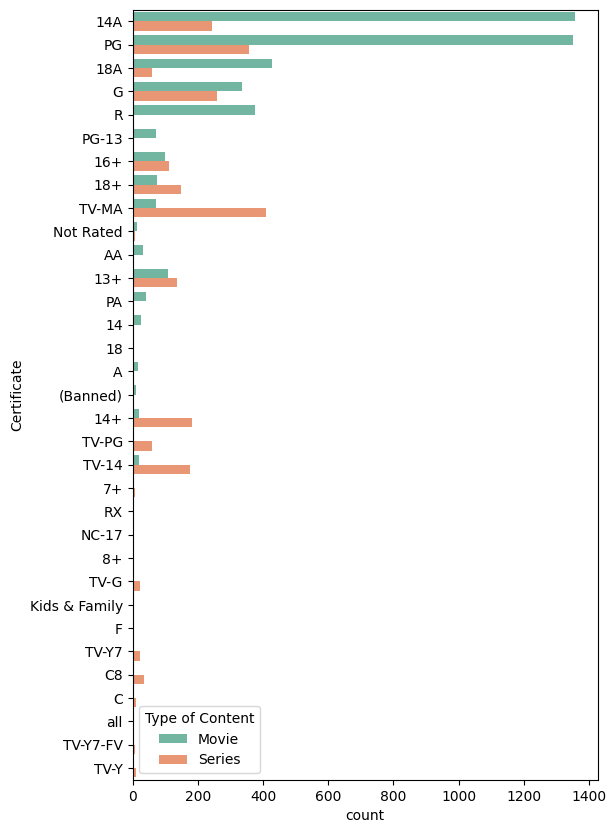

In [134]:
plt.figure(figsize=(6,10))
sns.countplot(data= X, y= 'Certificate', hue= 'Type of Content',  palette = "Set2")
plt.show()

# Pandas Profiling (STEP 4)

In [195]:
from pandas_profiling import ProfileReport
prof = ProfileReport(X)
prof.to_file(output_file='output.html')

C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Summarize dataset:  71%|███████▏  | 15/21 [00:01<00:00,  8.17it/s, Calculate auto correlation]         C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\keera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sc

# Encoding methods (STEP 5)

In [194]:
# We have already done some encoding above (changing Year column to Released and Finish with numerical values)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Popularity Ranking  6763 non-null   int64 
 1   Name                6763 non-null   object
 2   Released            6763 non-null   int64 
 3   Finished            6763 non-null   object
 4   Certificate         6763 non-null   object
 5   Runtime             6763 non-null   object
 6   Genre               6763 non-null   object
 7   Rating              6763 non-null   object
 8   Summary             6763 non-null   object
 9   Director            4476 non-null   object
 10  Stars               6762 non-null   object
 11  Votes               6763 non-null   object
 12  Gross               3436 non-null   object
 13  Type of Content     6763 non-null   object
dtypes: int64(2), object(12)
memory usage: 792.5+ KB


In [188]:
# Lets convert Votes/Gross/Rating/Runtime into other Dtype first

def change_votes(x):
   return int(re.sub(r'\D' , '', x))

def change_runtime(x):
   return int((re.findall(r'\d+', x))[0])

def change_rating(x):
   return float(x)

def change_gross(x):
   try:
      return float((re.findall(r'\d+.\d+' , x))[0])
   except:
      return np.NaN

X['Votes'] = X['Votes'].apply(change_votes)
X['Gross'] = X['Gross'].apply(change_gross)
X['Runtime'] = X['Runtime'].apply(change_runtime)
X['Rating'] = X['Rating'].apply(change_rating)

X.rename(columns= {'Runtime' : 'Runtime (Minutes)', 'Gross' : 'Gross (M)'}, inplace= True)

X['Type of Content'].replace(['Movie', 'Series'], [0, 1], inplace=True)

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\324634148.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Votes'] = X['Votes'].apply(change_votes)
C:\Users\keera\AppData\Local\Temp\ipykernel_3060\324634148.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gross'] = X['Gross'].apply(change_gross)
C:\Users\keera\AppData\Local\Temp\ipykernel_3060\324634148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [189]:
def convert(x):
    return round(float(x))

X['Rating'] = X['Rating'].apply(convert)

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1511575996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Rating'] = X['Rating'].apply(convert)


In [190]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity Ranking  6763 non-null   int64  
 1   Name                6763 non-null   object 
 2   Released            6763 non-null   int64  
 3   Finished            6763 non-null   object 
 4   Certificate         6763 non-null   object 
 5   Runtime (Minutes)   6763 non-null   int64  
 6   Genre               6763 non-null   object 
 7   Rating              6763 non-null   int64  
 8   Summary             6763 non-null   object 
 9   Director            4476 non-null   object 
 10  Stars               6762 non-null   object 
 11  Votes               6763 non-null   int64  
 12  Gross (M)           3436 non-null   float64
 13  Type of Content     6763 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 792.5+ KB


In [193]:
X[['Name', 'Finished', 'Certificate', 'Genre', 'Summary', 'Director', 'Stars']].nunique()

Name           6486
Finished         99
Certificate      33
Genre           438
Summary        6763
Director       2014
Stars          6728
dtype: int64

Since there are alot of unique values which will incerease the features in our dataset drastically, so we are not converting any more values to int/float. We can apply it on Certificate, but that will be extended on the project

# Checking outliers (STEP 6)

In [102]:
X.describe()

,Popularity Ranking,Released,Runtime (Minutes),Rating,Votes,Gross (M),Type of Content
count,6763.000000,6763.00000,6763.000000,6763.000000,6.763000e+03,3436.000000,6763.000000
mean,2221.189561,2006.92252,90.305486,6.905855,1.226824e+05,68.423786,0.338164
std,1434.942550,15.62487,44.678438,1.020651,2.022425e+05,86.538941,0.473119
min,1.000000,1920.00000,4.000000,1.600000,1.000000e+01,0.000000,0.000000
25%,959.000000,1999.00000,55.000000,6.300000,1.425850e+04,14.780000,0.000000
50%,2070.000000,2012.00000,98.000000,7.000000,5.462800e+04,41.470000,0.000000
75%,3416.500000,2019.00000,116.000000,7.600000,1.432480e+05,88.730000,1.000000
max,4999.000000,2023.00000,566.000000,9.500000,2.714650e+06,936.660000,1.000000


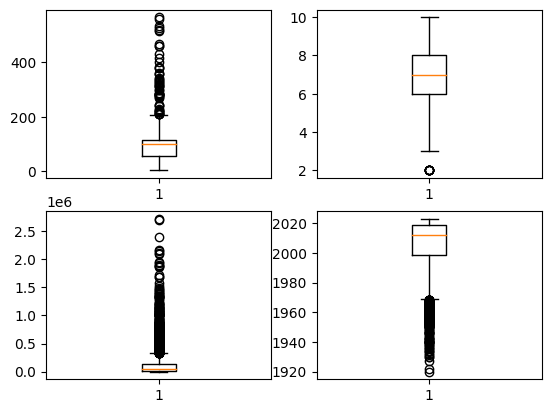

In [236]:
fig, ax = plt.subplots(2,2)
boxplot_data = X['Runtime (Minutes)'].values
rating_data = X['Rating'].values
votes_data = X['Votes'].values
runtime_data = X['Released'].values
ax[0,0].boxplot(boxplot_data)
ax[0,1].boxplot(rating_data)
ax[1,0].boxplot(votes_data)
ax[1,1].boxplot(runtime_data)
plt.show()

In [237]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR
print(IQR)

Popularity Ranking      2457.50
Released                  20.00
Runtime (Minutes)         61.00
Rating                     2.00
Votes                 128989.50
Gross (M)                 73.95
Type of Content            1.00
dtype: float64


In [238]:
(((X < LW) | (X > UW))).value_counts()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\4158904436.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((X < LW) | (X > UW))).value_counts()


Certificate  Director  Finished  Genre  Gross (M)  Name   Popularity Ranking  Rating  Released  Runtime (Minutes)  Stars  Summary  Type of Content  Votes
False        False     False     False  False      False  False               False   False     False              False  False    False            False    5867
                                                                                                                                                    True      397
                                                                                      True      False              False  False    False            False     198
                                        True       False  False               False   False     False              False  False    False            True      175
                                                                                                                                                    False      52
                                    

# Addressing Outliers (STEP 7)

In [198]:
outliers_column_name = LW.index

### Now lets address outliers using Quantile-based Flooring and Capping first

In [239]:
dummy_db = X.copy()

In [240]:
floor_value = dummy_db.quantile(0.01)
ceiling_value = dummy_db.quantile(0.99)

In [ ]:
for i, j in zip(outliers_column_name, range(len(outliers_column_name))):
    
    dummy_db[i] = np.where(dummy_db[i] < floor_value[j], floor_value[j], dummy_db[i])
    dummy_db[i] = np.where(dummy_db[i] > ceiling_value[j], ceiling_value[j], dummy_db[i])

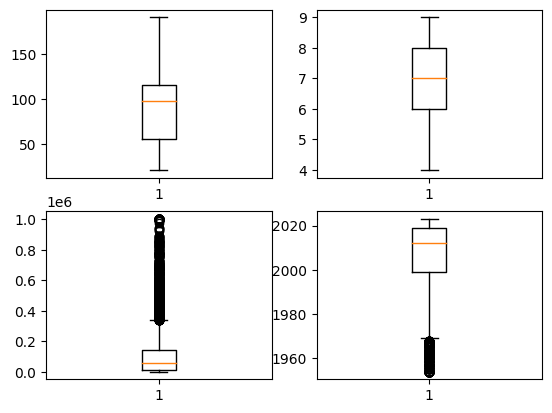

In [226]:
fig, ax = plt.subplots(2,2)
boxplot_data = dummy_db['Runtime (Minutes)'].values
rating_data = dummy_db['Rating'].values
votes_data = dummy_db['Votes'].values
runtime_data = dummy_db['Released'].values
ax[0,0].boxplot(boxplot_data)
ax[0,1].boxplot(rating_data)
ax[1,0].boxplot(votes_data)
ax[1,1].boxplot(runtime_data)
plt.show()

In [243]:
(((dummy_db < LW) | (dummy_db > UW))).value_counts()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\1515554613.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((dummy_db < LW) | (dummy_db > UW))).value_counts()


Certificate  Director  Finished  Genre  Gross (M)  Name   Popularity Ranking  Rating  Released  Runtime (Minutes)  Stars  Summary  Type of Content  Votes
False        False     False     False  False      False  False               False   False     False              False  False    False            False    5921
                                                                                                                                                    True      400
                                                                                      True      False              False  False    False            False     203
                                        True       False  False               False   False     False              False  False    False            True      175
                                                                                                                                                    False      52
                                    

By converting .1% of our outliers we are only able to remove ~100 outliers 

### Trimming

In [244]:
# Now lets trim on the above dummy db

D_Q1 = dummy_db.quantile(0.25)
D_Q3 = dummy_db.quantile(0.75)
D_IQR = D_Q3 - D_Q1
D_LW = D_Q1 - 1.5*D_IQR
D_UW = D_Q3 + 1.5*D_IQR
print(D_IQR)

Popularity Ranking      2457.50
Released                  20.00
Runtime (Minutes)         61.00
Rating                     2.00
Votes                 128989.50
Gross (M)                 73.95
Type of Content            1.00
dtype: float64


In [252]:
index = []
for i, j in zip(outliers_column_name, range(len(outliers_column_name))):
    index.extend(dummy_db[(dummy_db[i] >= D_UW[j]) | (dummy_db[i] <= D_LW[j])].index)

len((index))

1046

In [253]:
# There might be some index which have 2 outliers so they are appearing twice, lets first handle this

index = list(set(index))
len(index)

859

In [254]:
dummy_db.drop(index, inplace= True)

In [257]:
print(X.shape)
print(dummy_db.shape)

(6763, 14)
(5904, 14)


### Log Transformation

In [258]:
dummy_db = X.copy()

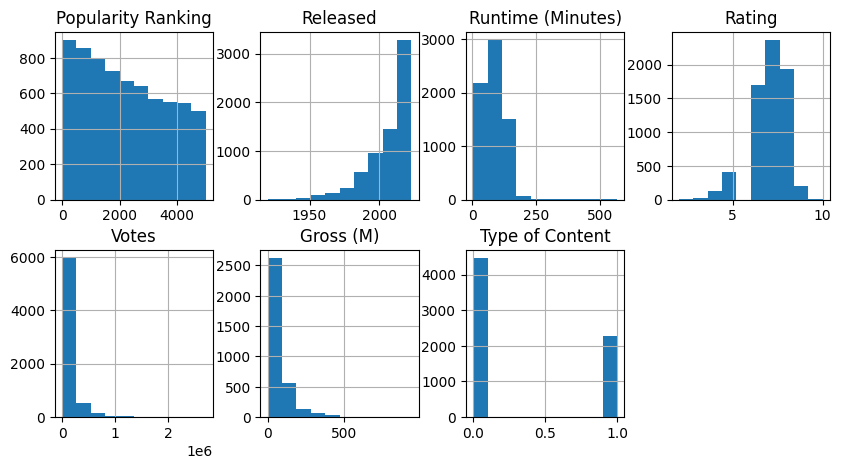

In [268]:
dummy_db.hist(bins= 10, layout= (2, 4), figsize= (10,5))
plt.show()

In [270]:
dummy_db.skew()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\755786058.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dummy_db.skew()


Popularity Ranking    0.245950
Released             -1.534668
Runtime (Minutes)     1.725246
Rating               -0.603475
Votes                 4.382128
Gross (M)             3.222317
Type of Content       0.684327
dtype: float64

In [271]:
for i in outliers_column_name:
    dummy_db[i] = dummy_db[i].map(lambda x: np.log(x) if x > 0 else 0)
dummy_db.skew()

C:\Users\keera\AppData\Local\Temp\ipykernel_20872\1091718876.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dummy_db.skew()


Popularity Ranking   -1.688582
Released             -1.562210
Runtime (Minutes)    -0.992233
Rating               -1.475190
Votes                -0.599974
Gross (M)             0.361894
Type of Content       0.000000
dtype: float64

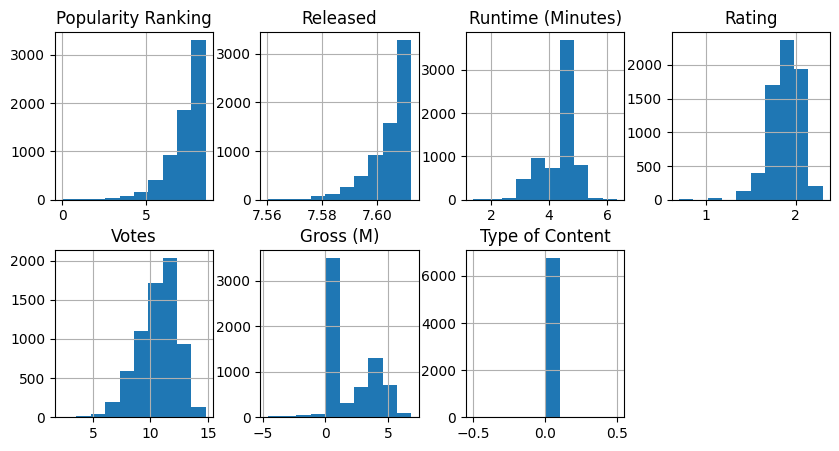

In [272]:
dummy_db.hist(bins= 10, layout= (2, 4), figsize= (10,5))
plt.show()

After seeing the data columns above and data; we will not remove outliers since those data does make sense in our data

# Unsupervised Learning K-Means (STEP 8)

In [53]:
from sklearn.cluster import KMeans

In [54]:
# Not using float64 as it contains NaN values

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity Ranking  6763 non-null   int64  
 1   Name                6763 non-null   object 
 2   Released            6763 non-null   int64  
 3   Finished            6763 non-null   object 
 4   Certificate         6763 non-null   object 
 5   Runtime (Minutes)   6763 non-null   int64  
 6   Genre               6763 non-null   object 
 7   Rating              6763 non-null   int64  
 8   Summary             6763 non-null   object 
 9   Director            4476 non-null   object 
 10  Stars               6762 non-null   object 
 11  Votes               6763 non-null   int64  
 12  Gross (M)           3436 non-null   float64
 13  Type of Content     6763 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 792.5+ KB


In [128]:
data = X.select_dtypes(include= ['int64'])

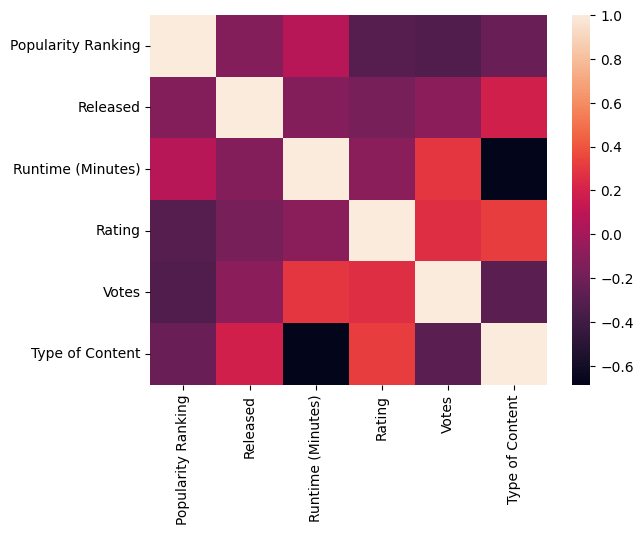

In [129]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

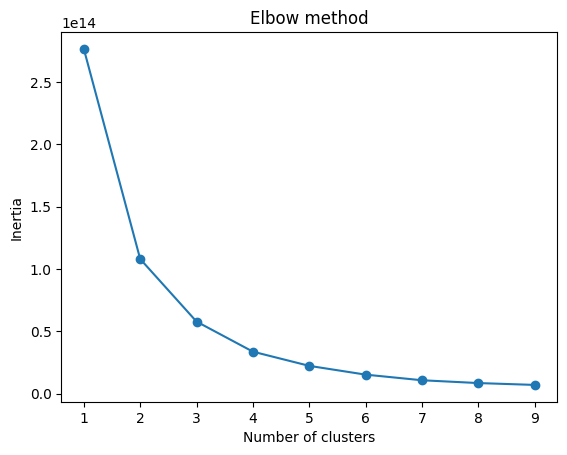

In [130]:
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [131]:
kmeans = KMeans(n_clusters= 4)
kmeans.fit(data)
data['Group'] = kmeans.labels_.astype(int)

In [132]:
data['Group'].value_counts()

0    5072
2    1308
1     331
3      52
Name: Group, dtype: int64

In [133]:
data.head(5)

,Popularity Ranking,Released,Runtime (Minutes),Rating,Votes,Type of Content,Group
0,1,2023,122,7,20665,0,0
1,2,2023,116,7,21205,0,0
2,3,2022,139,8,371173,0,2
3,4,2023,95,6,22380,0,0
4,5,2022,117,8,89630,0,0


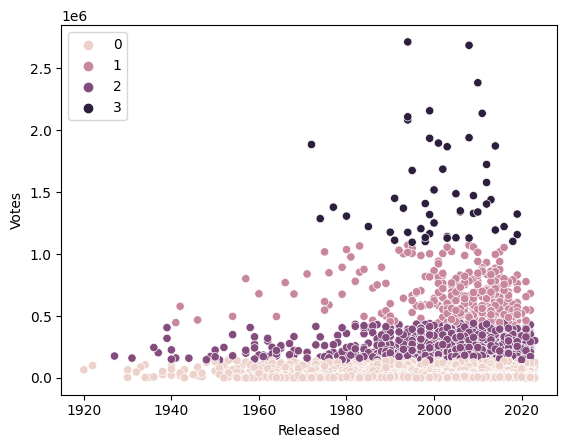

In [134]:
sns.scatterplot(data= data, y= 'Votes', x= 'Released', hue= 'Group')
plt.legend(loc='upper left')
plt.show()

# Some NLP Techniques (STEP 9)

In [155]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

#### Tokenizing

In [143]:
# Tokenizing
X['Tokenized_Word'] = X['Summary'].apply(lambda x: word_tokenize(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\689665636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tokenized_Word'] = X['Summary'].apply(lambda x: word_tokenize(x))


####  Removing Stopwords and punctuations

In [172]:
nltk.download('stopwords')
stopword = stopwords.words('english')
punctuation = list(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
#  Removing Stopwords and punctuations

def clean(x):
    token = []
    for i in x:
        if (i not in stopword) and (i not in punctuation):
            token.append(i)
    return token

X['Cleaned_Token'] = X['Tokenized_Word'].apply(lambda x: clean(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1023688729.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cleaned_Token'] = X['Tokenized_Word'].apply(lambda x: clean(x))


#### Stemming

In [175]:
def stemming(x):
    return [porter.stem(z) for z in x]

porter = PorterStemmer()
X['Stem_Token'] = X['Cleaned_Token'].apply(lambda x: stemming(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1870536170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Stem_Token'] = X['Cleaned_Token'].apply(lambda x: stemming(x))


#### Lemmatization

In [178]:
def lemmatization(x):
    return [lem.lemmatize(z, pos='a') for z in x]

lem = WordNetLemmatizer()
X['Lem_Token'] = X['Cleaned_Token'].apply(lambda x: lemmatization(x))

C:\Users\keera\AppData\Local\Temp\ipykernel_3060\1065949274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Lem_Token'] = X['Cleaned_Token'].apply(lambda x: lemmatization(x))


In [185]:
X[['Tokenized_Word', 'Cleaned_Token', 'Stem_Token', 'Lem_Token']].head(5)

,Tokenized_Word,Cleaned_Token,Stem_Token,Lem_Token
0,"[In, the, next, installment, ,, the, survivors...","[In, next, installment, survivors, Ghostface, ...","[in, next, instal, survivor, ghostfac, kill, l...","[In, next, installment, survivors, Ghostface, ..."
1,"[Adonis, has, been, thriving, in, both, his, c...","[Adonis, thriving, career, family, life, child...","[adoni, thrive, career, famili, life, childhoo...","[Adonis, thriving, career, family, life, child..."
2,"[A, middle-aged, Chinese, immigrant, is, swept...","[A, middle-aged, Chinese, immigrant, swept, in...","[a, middle-ag, chines, immigr, swept, insan, a...","[A, middle-aged, Chinese, immigrant, swept, in..."
3,"[An, oddball, group, of, cops, ,, criminals, ,...","[An, oddball, group, cops, criminals, tourists...","[an, oddbal, group, cop, crimin, tourist, teen...","[An, oddball, group, cops, criminals, tourists..."
4,"[A, reclusive, ,, morbidly, obese, English, te...","[A, reclusive, morbidly, obese, English, teach...","[a, reclus, morbidli, obes, english, teacher, ...","[A, reclusive, morbidly, obese, English, teach..."
